In [1]:
import random
random.seed(24071992)
import numpy as np
np.random.seed(24071992)
import matplotlib
import matplotlib.pyplot as plt
import scipy.spatial
import pickle
import pandas as pd
import scipy
# http://stackoverflow.com/questions/10143905/python-two-curve-gaussian-fitting-with-non-linear-least-squares
from sklearn import mixture
import matplotlib.pyplot
import matplotlib.mlab
import numpy as np
import itertools
#import seaborn as sns
import math
from sklearn.neighbors import KernelDensity
plt.rcParams.update({'figure.max_open_warning': 150})


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

%matplotlib notebook
#%matplotlib inline

In [2]:
import scipy
scipy.spatial.KDTree.sparse_distance_matrix

<function scipy.spatial.kdtree.KDTree.sparse_distance_matrix>

# Random cells

In [3]:
centroid = np.random.rand(50,2)

<IPython.core.display.Javascript object>


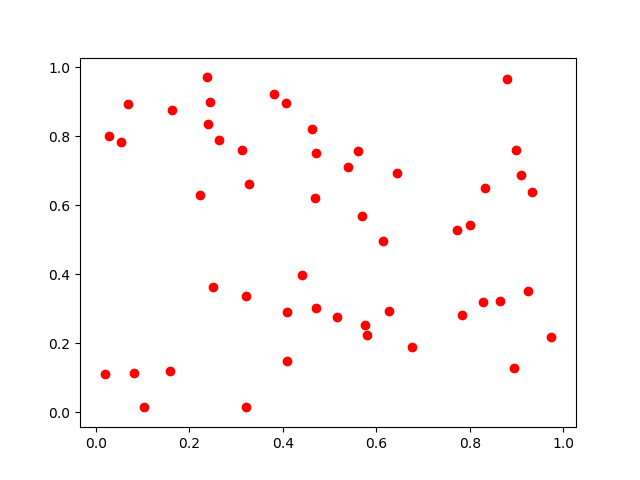

In [12]:
def cell_scatter(arr2D, color='blue'):
    
    for i in range(len(arr2D)):
        plt.scatter(arr2D[i][0], arr2D[i][1], c=color)
        
cell_scatter(centroid, 'red')

<IPython.core.display.Javascript object>


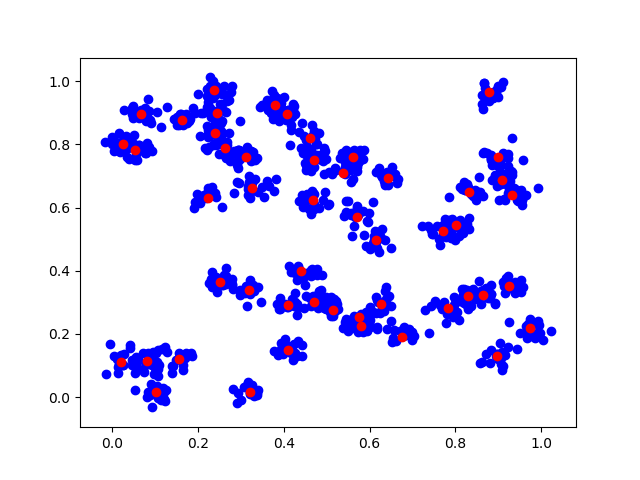

In [13]:
cloud = 20
dots = np.zeros([len(centroid)*cloud, 2])
plt.figure()
for i, p in enumerate(centroid):
    for n in range(cloud):
        pos = i*cloud + n
        x_shift = np.random.normal(0, scale=0.02)
        y_shift = np.random.normal(0, scale=0.02)
        dots[pos] = p[0]+x_shift, p[1]+y_shift

cell_scatter(dots)
cell_scatter(centroid, color='red')

<IPython.core.display.Javascript object>


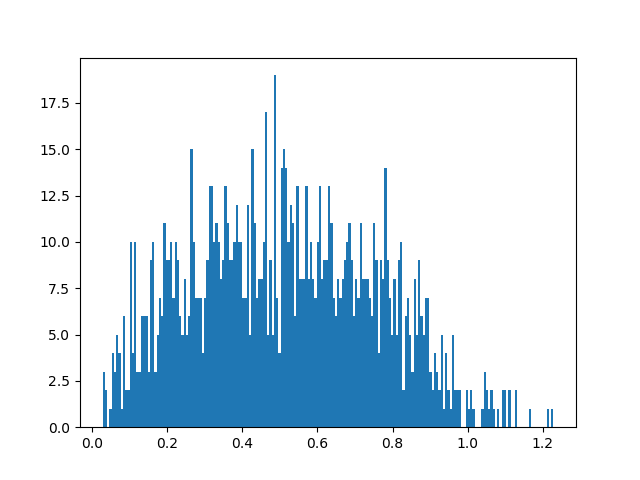

In [15]:
plt.figure()
dist = scipy.spatial.distance.pdist(centroid)
plt.hist(dist,bins=200);

# Cells in a grid

[ 0.  0.]
[ 0.  1.]
[ 0.  2.]
[ 0.  3.]
[ 1.  0.]
[ 1.  1.]
[ 1.  2.]
[ 1.  3.]
[ 2.  0.]
[ 2.  1.]
[ 2.  2.]
[ 2.  3.]
[ 3.  0.]
[ 3.  1.]
[ 3.  2.]
[ 3.  3.]


<IPython.core.display.Javascript object>


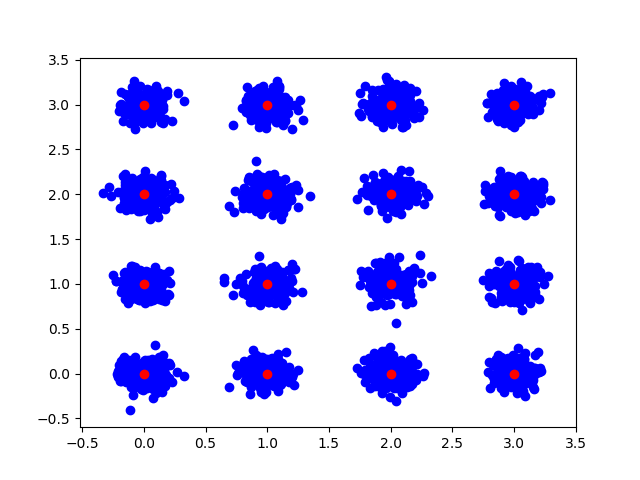

In [16]:
cloud = 200
grid_c = np.zeros([16, 2])

for i, p in enumerate(grid_c):
    x = int(i/4)
    y = [0,1,2,3,0,1,2,3,0,1,2,3,0,1,2,3]
    y = y[i]
    grid_c[i] = x,y

    
grid_p = np.zeros([len(grid_c)*cloud, 2])
for i, p in enumerate(grid_c):
    print(p)
    for n in range(cloud):
        pos = i*cloud + n
        x_shift = np.random.normal(0, scale=0.1)
        y_shift = np.random.normal(0, scale=0.1)
        grid_p[pos] = p[0]+x_shift, p[1]+y_shift
plt.figure()    
cell_scatter(grid_p)
cell_scatter(grid_c, color='red')

<IPython.core.display.Javascript object>


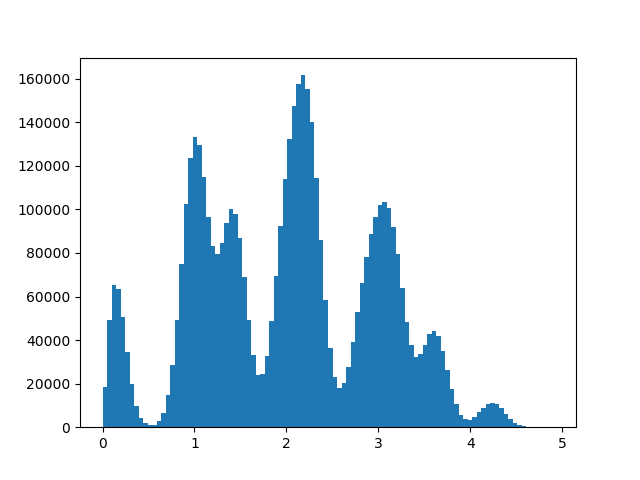

In [18]:
dist = scipy.spatial.distance.pdist(grid_p, )
plt.figure()
plt.hist(dist,bins=100);

In [19]:
#scipy.spatial.KDTree.sparse_distance_matrix()
grid_p_tree = scipy.spatial.KDTree(grid_p)

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4
  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9
  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4. ]


<IPython.core.display.Javascript object>


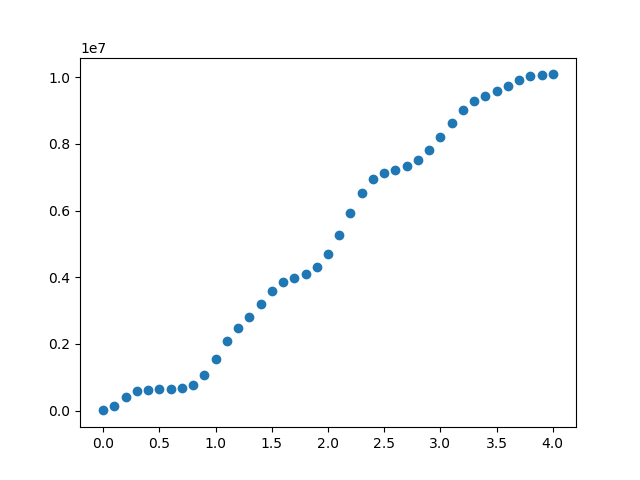

In [20]:
interval = np.linspace(0,4,41)
print(interval)
plt.figure()
plt.scatter(interval, grid_p_tree.count_neighbors(grid_p_tree, interval));
#Logically, the KDTree has more neighbours if you increase the range.
#You see the same jumps as with the above histogram

# Sparse distance matrix

In [21]:
grid_p_sparse = grid_p_tree.sparse_distance_matrix(grid_p_tree, max_distance=2)
grid_p_sparse

<3200x3200 sparse matrix of type '<class 'numpy.float64'>'
	with 4705890 stored elements in Dictionary Of Keys format>

<IPython.core.display.Javascript object>


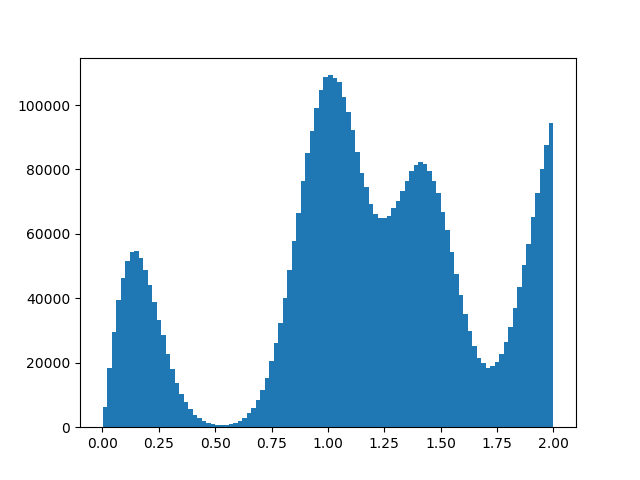

In [23]:
sparse_values = np.array(list(grid_p_sparse.values()))
plt.figure()
plt.hist(sparse_values, bins=100);

<IPython.core.display.Javascript object>


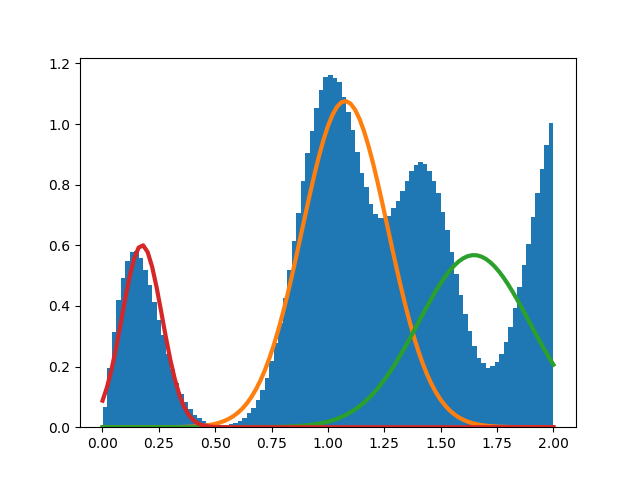

In [24]:
plt.figure()
clf = mixture.GaussianMixture(n_components=3, covariance_type='full')
data = np.reshape(sparse_values, (len(sparse_values),1))
clf.fit(data)
m1, m2, m3 = clf.means_
w1, w2, w3= clf.weights_
c1, c2, c3 = clf.covariances_
histdist = matplotlib.pyplot.hist(data, 100, normed=True)
plotgauss1 = lambda x: plt.plot(x,w1*matplotlib.mlab.normpdf(x,m1,np.sqrt(c1))[0], linewidth=3)
plotgauss2 = lambda x: plt.plot(x,w2*matplotlib.mlab.normpdf(x,m2,np.sqrt(c2))[0], linewidth=3)
plotgauss3 = lambda x: plt.plot(x,w3*matplotlib.mlab.normpdf(x,m3,np.sqrt(c3))[0], linewidth=3)
plotgauss1(histdist[1])
plotgauss2(histdist[1])
plotgauss3(histdist[1])

<IPython.core.display.Javascript object>


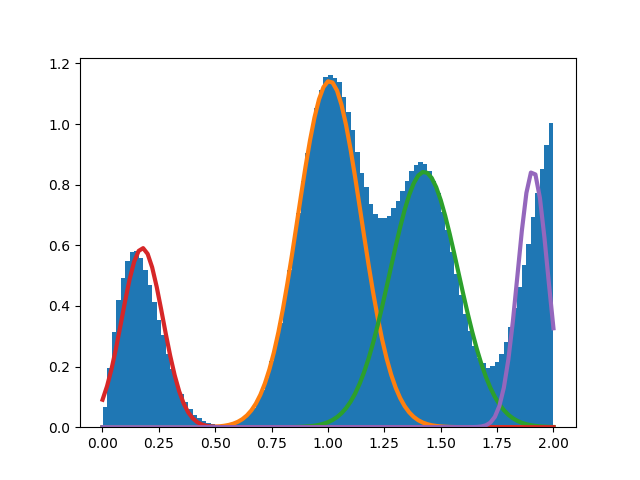

In [25]:
plt.figure()
clf = mixture.GaussianMixture(n_components=4, covariance_type='full')
data = np.reshape(sparse_values, (len(sparse_values),1))
clf.fit(data)
m1, m2, m3, m4 = clf.means_
w1, w2, w3, w4= clf.weights_
c1, c2, c3, c4 = clf.covariances_
histdist = matplotlib.pyplot.hist(data, 100, normed=True)
plotgauss1 = lambda x: plt.plot(x,w1*matplotlib.mlab.normpdf(x,m1,np.sqrt(c1))[0], linewidth=3)
plotgauss2 = lambda x: plt.plot(x,w2*matplotlib.mlab.normpdf(x,m2,np.sqrt(c2))[0], linewidth=3)
plotgauss3 = lambda x: plt.plot(x,w3*matplotlib.mlab.normpdf(x,m3,np.sqrt(c3))[0], linewidth=3)
plotgauss4 = lambda x: plt.plot(x,w4*matplotlib.mlab.normpdf(x,m4,np.sqrt(c4))[0], linewidth=3)
plotgauss1(histdist[1])
plotgauss2(histdist[1])
plotgauss3(histdist[1])
plotgauss4(histdist[1])

# Vorronoi
    move this later to another notebook

In [ ]:
five = np.random.rand(5, 2)
ten = np.random.rand(10,2)

In [ ]:
vor = scipy.spatial.Voronoi(ten)
scipy.spatial.voronoi_plot_2d(vor, show_vertices=False);

In [ ]:
plt.scatter(vor.ridge_vertices)

In [ ]:
e = vor.ridge_vertices

e[0:1,:]

In [ ]:
dela = scipy.spatial.Delaunay(five)
scipy.spatial.delaunay_plot_2d(dela);

# Cortex data

In [26]:
df_fish_totmol_clean = pickle.load(open("df_fish_totmol_clean.p", 'rb'))
df_coord = pickle.load(open("Cell_coordinates.p", 'rb'))
df_coord = df_coord.loc[:,df_fish_totmol_clean.columns]
df_coord = df_coord.T
labels_a = pickle.load(open("labels_a_df_fish_totmol_clean.p", 'rb'))

cell_labels = dict(zip(df_fish_totmol_clean.columns, labels_a))

In [27]:
label_cells = {}
for i in np.unique(labels_a):
    label_cells[i] = []

for n,c in enumerate(df_fish_totmol_clean.columns):
    label_cells[labels_a[n]].append(c)
    

In [28]:
cluster_names = {13: 'Pyramidal L4 2',
17: 'Oligodendrocyte COP',
21: 'Pyramidal interface L3-4',
27: 'Ependymal',
37: 'Pericytes',
41: 'Oligodendrocytes MF',
43: 'OPC',
45: 'Lamp5+',
47: 'Interneuron Kcnip Pthlh',
54: 'Pyramidal L2-3',
55: 'Pyramidal L2-3 L5',
61: 'Oligodendrocyte NF',
62: 'Astrocyte Mfge8',
63: 'Astrocyte Gfap',
66: 'Interneuron Kcnip2',
68: 'Interneuron Kcnip2, Syt6',
69: 'Interneuron Gad2 Slc32a1-',
73: 'Interneuron Cnr1 Vip Crh',
75: 'Microglia',
78: 'Interneuron Cnr1',
79: 'Hippocampal neuron',
81: 'Choroid plexus',
83: 'PVM VSM',
85: 'Interneuron Vip',
86: 'Interneuron Lamp5',
87: 'Pyramidal L5',
88: 'BQ',
89: 'Endothelial 1',
90: 'Pyramidal L4',
91: 'Pyramidal L6',
92: 'Endothelial',
93: 'Interneuron Crhbp',
94: 'Oligodendrocyte mature'}

<IPython.core.display.Javascript object>


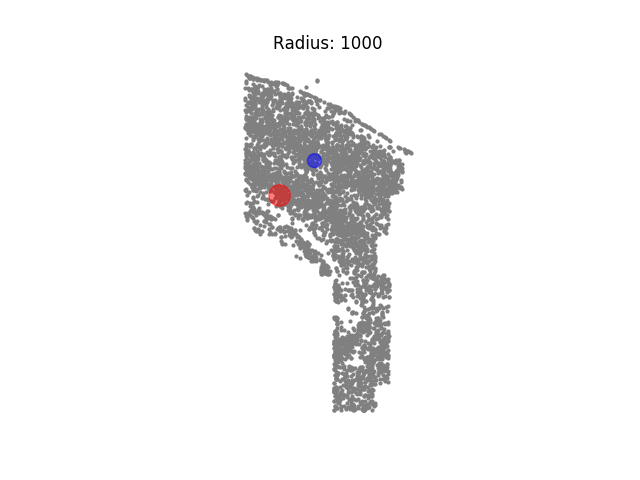

In [29]:
#plt.ion()
plt.figure()
ax = plt.gca()
plt.scatter(df_coord.loc[:,'X'], df_coord.loc[:,'Y'], c='gray', s=4)
radius = 1000
circle = plt.Circle((15000, 15000), radius, color='blue', alpha=0.5)
ax.add_artist(circle)
circle2 = plt.Circle((20000, 20000), (100/0.065), color='red', alpha=0.5)
ax.add_artist(circle2)
ax.set_aspect('equal')
ax.set_axis_off()
ax.invert_yaxis()
ax.invert_xaxis()
ax.set_title('Radius: {}'.format(radius))

In [30]:
tree = scipy.spatial.KDTree(df_coord)
sparse_dm = tree.sparse_distance_matrix(tree, max_distance=1000)

In [31]:
dense_dm = sparse_dm.todense()
df_dense_dm = pd.DataFrame(data=dense_dm, index=df_coord.index, columns=df_coord.index)

<IPython.core.display.Javascript object>


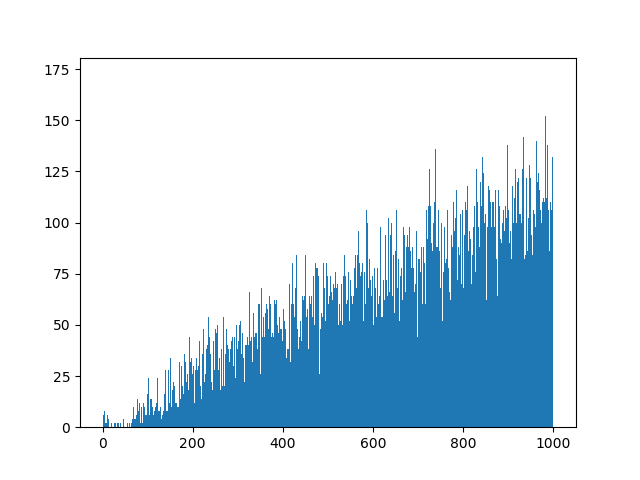

In [32]:
plt.figure()
sparse_values = np.array(list(sparse_dm.values()))
plt.hist(sparse_values, bins=2000, );

## neighbours within radius

In [33]:
count = 0
for i in itertools.combinations(np.unique(labels_a), 2):
    count += 1
    #print(i)
print(count)

465


In [34]:
n_clust = len(np.unique(labels_a))    
n_combi = math.factorial(n_clust) / ((math.factorial(2)) * math.factorial(n_clust - 2))

combinations = [i for i in itertools.combinations(np.unique(labels_a), 2)]

In [ ]:
plt.ion()

for i in [i for i in combinations if 62 in i]: #combinations[:5]:
    cl_1 = i[0]
    cl_2 = i[1]
    
    dist_of_interest = df_dense_dm.loc[label_cells[cl_1], label_cells[cl_2]].values.ravel()
    dist_of_interest = dist_of_interest[dist_of_interest != 0]
    if dist_of_interest.size == 0:
        print('Not neighbours for combination {}'.format(i))
        pass

    else:
        plt.figure(figsize=(10,4))
        kde = KernelDensity(kernel='gaussian', bandwidth=20).fit(dist_of_interest.reshape(-1, 1))
        X_plot = np.linspace(0, 1000, 1000)[:, np.newaxis]
        log_dens = kde.score_samples(X_plot)
        log_dens = log_dens
        plt.plot(X_plot[:, 0], np.exp(log_dens), alpha = 0.2)
        
        plt.scatter(dist_of_interest, np.zeros(len(dist_of_interest)), alpha=0.1)

        #plt.ylim((-0.001, (0.00025 * len(dist_of_interest))))
        #plt.gca().set_axis_off()
        plt.title('{}    {}'.format(cluster_names[cl_1], cluster_names[cl_2]))
        #plt.savefig('micro_structure/{}_-_{}.png'.format(cluster_names[cl_1], cluster_names[cl_2]) ,transparent = False)

## Closest neighbour in um

In [35]:
df_coord_um = df_coord * 0.065
tree_um = scipy.spatial.KDTree(df_coord_um)

In [36]:
#For each cell, find the closest neighbouring cell of all cell types
#Add the distances between these cells to a dictionary with distances 
#for each possible cluster combination (including itselve)
combination_distance_dict = {}
for i in combinations:
    combination_distance_dict[i] = []
for i in np.unique(labels_a):
    combination_distance_dict[(i,i)] = []

    
unique_labels = np.unique(labels_a)
for cell in df_fish_totmol_clean.columns:
    c_label = cell_labels[cell]
    dist = tree_um.query(df_coord_um.loc[cell], k = 1000)
    trim_n = 1000 - len(np.trim_zeros(dist[0], trim='f'))
    nearest_labels = [labels_a[i] for i in dist[1][trim_n:]]
    distances = dist[0][trim_n:]
    

    for l in unique_labels:
        try:
            combination_distance_dict[(c_label, l)].append(distances[nearest_labels.index(l)])
        except Exception as e:
            pass


In [37]:
column_names = ['{}_{}'.format(i[0], i[1]) for i in combination_distance_dict.keys()]
df_fit_gaus = pd.DataFrame(data = np.zeros((5, len(combination_distance_dict.keys()))), 
                           index=['mean', 'weights', 'covariance', 'std', 'median'], 
                           columns = column_names)

clf = mixture.GaussianMixture(n_components=1, covariance_type='full')
for i in list(combination_distance_dict.keys()):
    name = '{}_{}'.format(i[0], i[1])
    data = np.reshape(combination_distance_dict[i], (len(combination_distance_dict[i]),1))
    clf.fit(data)
    
    df_fit_gaus.loc['mean', name] = clf.means_
    df_fit_gaus.loc['weights', name] = clf.weights_
    df_fit_gaus.loc['covariance', name] = clf.covariances_
    df_fit_gaus.loc['std', name] = np.std(data)
    df_fit_gaus.loc['median', name] = np.median(data)
    
df_fit_gaus = df_fit_gaus.T

In [ ]:
#plt.ion()
plt.ioff()

combinations_to_plot = list(df_fit_gaus.sort_values(by='mean', ascending=True).index)

for n, combi in enumerate(combinations_to_plot):
    plt.figure()
    combi = (int(combi.split('_')[0]), int(combi.split('_')[1]))
    data = np.reshape(combination_distance_dict[combi], (len(combination_distance_dict[combi]),1))
    histdist = plt.hist(data, 50)

    clf = mixture.GaussianMixture(n_components=1, covariance_type='full')

    clf.fit(data)
    m = clf.means_
    w= clf.weights_
    c = clf.covariances_
    plotgauss1 = lambda x: plt.plot(x, w *matplotlib.mlab.normpdf(x,m,np.sqrt(c))[0], linewidth=3)
    plotgauss1(histdist[1].reshape(-1,1))
    
    plt.xlim(0, 500)
    plt.title('{}    {}'.format(cluster_names[combi[0]], cluster_names[combi[1]]))
    plt.savefig('micro_structure/Sort_on_mean/{}_{}_{}.png'.format(n, cluster_names[combi[0]], cluster_names[combi[1]]))
    plt.close()
    

In [68]:
cluster_colors = {
    13: '#4facdc',
    17: '#5bc241',
    21: '#31609d',
    27: '#ffdf05',
    37: '#ccec19',
    41: '#508966',
    43: '#64c099',
    45: '#0e5d77',
    47: '#d5416a',
    54: '#62a8ba',
    55: '#396e87',
    61: '#66a44f',
    62: '#f69048',
    63: '#dc4501',
    66: '#983fd8',
    68: '#d0839e',
    69: '#592d95',
    73: '#a7506a',
    75: '#00c690',
    78: '#a16cda',
    79: '#06405e',
    81: '#026449',
    83: '#bc23b3',
    85: '#68396c',
    86: '#cf47ac',
    87: '#80a5da',
    88: '#6b6b6b',
    89: '#ef5454',
    90: '#41c6dd',
    91: '#538ee1',
    92: '#fb2828',
    93: '#bc89ca',
    94: '#2c5525'
}

<IPython.core.display.Javascript object>


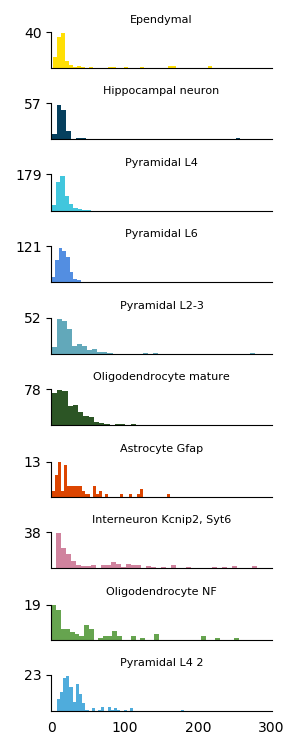

Ependymal
Hippocampal neuron
Pyramidal L4
Pyramidal L6
Pyramidal L2-3
Oligodendrocyte mature
Astrocyte Gfap
Interneuron Kcnip2, Syt6
Oligodendrocyte NF
Pyramidal L4 2


In [76]:
self_association = ['{}_{}'.format(i,i) for i in np.unique(labels_a)]
self_association_sort = df_fit_gaus.loc[self_association,'median'].sort_values().index

top = 10
x_limit = 300

nrows = len(self_association_sort[:top])
figsize_x = 3
figsize_y = nrows * 0.75

fig, axes = plt.subplots(nrows=nrows, ncols=1, figsize=(figsize_x, figsize_y), sharex=True)

for combi, ax in zip(self_association_sort, axes):
    combi = (int(combi.split('_')[0]), int(combi.split('_')[1]))
    data = np.reshape(combination_distance_dict[combi], (len(combination_distance_dict[combi]),1))
    data = data[data < x_limit]

    ax.hist(data, 40, color = cluster_colors[combi[0]])
    
    #set the limits between zero and the end
    start, end = ax.get_ylim()
    ax.set_ylim(0, end)
    ax.spines['left'].set_bounds(0, int(end))
    ax.set_yticks([int(end)])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.tick_params(bottom='off')
    ax.set_title('{}'.format(cluster_names[combi[0]], cluster_names[combi[1]]), size=8)
    print('{}'.format(cluster_names[combi[0]], cluster_names[combi[1]]))

    
plt.xlim(0,x_limit)
plt.tight_layout()
#plt.savefig('Self_association.png', dpi= 300)

<IPython.core.display.Javascript object>


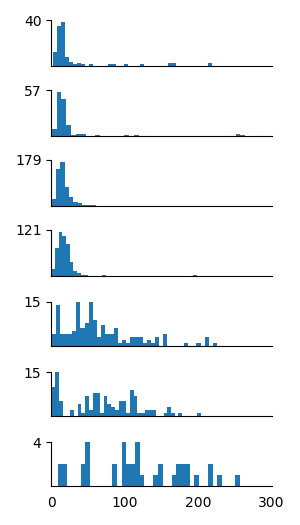

Ependymal
Hippocampal neuron
Pyramidal L4
Pyramidal L6
Astrocyte Mfge8
OPC
Microglia


In [82]:
combinations_self_association = [[27,27],
                                [79,79],
                                 [90,90],
                                 [91,91],
                                 [62,62],
                                 [43,43],
                                 [75,75,],
                                ]

x_limit = 300

nrows = len(combinations_self_association)
figsize_x = 3
figsize_y = nrows * 0.75

fig, axes = plt.subplots(nrows=nrows, ncols=1, figsize=(figsize_x, figsize_y), sharex=True)

for combi, ax in zip(combinations_self_association, axes):
    combi = (int(combi[0]), int(combi[1]))
    data = np.reshape(combination_distance_dict[combi], (len(combination_distance_dict[combi]),1))
    data = data[data < x_limit]

    ax.hist(data, 40)#color = cluster_colors[combi[0]])
    
    #set the limits between zero and the end
    start, end = ax.get_ylim()
    ax.set_ylim(0, end)
    ax.spines['left'].set_bounds(0, int(end))
    ax.set_yticks([int(end)])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.tick_params(bottom='off')
    #ax.set_title('{}'.format(cluster_names[combi[0]], cluster_names[combi[1]]), size=8)
    print('{}'.format(cluster_names[combi[0]], cluster_names[combi[1]]))

    
plt.xlim(0,x_limit)
plt.tight_layout()
plt.savefig('Self_association.png', dpi= 300)

<IPython.core.display.Javascript object>


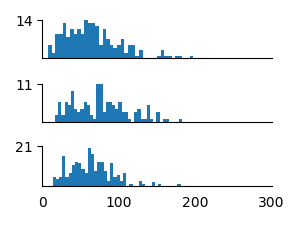

Pyramidal L2-3 L5 Astrocyte Mfge8
Pyramidal L4 2 Astrocyte Mfge8
Lamp5+ Astrocyte Mfge8


In [99]:
combinations_type_association_lamp5 = [[55,62],
                                 [13,62],
                                 [45,62]]

combinations_type_association_NO_lamp5 = [[62,90],
                                          [62,87],
                                         [62,91],
                                         
                                        ]

x_limit = 300

nrows = len(combinations_type_association_lamp5)
figsize_x = 3
figsize_y = nrows * 0.75

fig, axes = plt.subplots(nrows=nrows, ncols=1, figsize=(figsize_x, figsize_y), sharex=True)

for combi, ax in zip(combinations_type_association_lamp5, axes):
    combi = (int(combi[0]), int(combi[1]))
    data = np.reshape(combination_distance_dict[combi], (len(combination_distance_dict[combi]),1))
    data = data[data < x_limit]

    ax.hist(data, 40)
    
    #set the limits between zero and the end
    start, end = ax.get_ylim()
    ax.set_ylim(0, end)
    ax.spines['left'].set_bounds(0, int(end))
    ax.set_yticks([int(end)])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.tick_params(bottom='off')
    #ax.set_title('{}_{}'.format(cluster_names[combi[0]], cluster_names[combi[1]]), size=8)
    print('{} {}'.format(cluster_names[combi[0]], cluster_names[combi[1]]))

    
plt.xlim(0,x_limit)
plt.tight_layout()
#plt.savefig('type_association_Lamp5.png', dpi= 300)

<IPython.core.display.Javascript object>


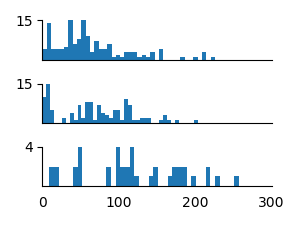

Astrocyte Mfge8 Astrocyte Mfge8
OPC OPC
Microglia Microglia


In [113]:
combinations_self_association_short = [[27,27],
                                 [79,79],
                                 [90,90]]

combinations_self_association_long = [[62,62],
                                          [43,43],
                                         [75,75]]                       
                                        

x_limit = 300

nrows = len(combinations_self_association_long)
figsize_x = 3
figsize_y = nrows * 0.75

fig, axes = plt.subplots(nrows=nrows, ncols=1, figsize=(figsize_x, figsize_y), sharex=True)

for combi, ax in zip(combinations_self_association_long, axes):
    combi = (int(combi[0]), int(combi[1]))
    data = np.reshape(combination_distance_dict[combi], (len(combination_distance_dict[combi]),1))
    data = data[data < x_limit]

    ax.hist(data, 40)
    
    #set the limits between zero and the end
    start, end = ax.get_ylim()
    ax.set_ylim(0, end)
    ax.spines['left'].set_bounds(0, int(end))
    ax.set_yticks([int(end)])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.tick_params(bottom='off')
    #ax.set_title('{}_{}'.format(cluster_names[combi[0]], cluster_names[combi[1]]), size=8)
    print('{} {}'.format(cluster_names[combi[0]], cluster_names[combi[1]]))

    
plt.xlim(0,x_limit)
plt.tight_layout()
plt.savefig('self_association_long.png', dpi= 300)

In [ ]:
plt.ion()
plt.figure()

combi = '90_90'
combi = (int(combi.split('_')[0]), int(combi.split('_')[1]))
data = np.reshape(combination_distance_dict[combi], (len(combination_distance_dict[combi]),1))

plt.hist(data, 50)


In [ ]:
m,w,c,s = df_fit_gaus.loc['90_90']
print(m,w,c,s)

In [ ]:
for i in np.unique(labels_a):
    print(i,i)